In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import numpy as np
import pandas as pd
import scipy
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import re
from scipy import stats

%matplotlib inline

In [44]:
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/Peak Finder Project/EChem_Data'

In [45]:
os.chdir('/content/drive/My Drive/Colab Notebooks/Peak Finder Project/EChem_Data')

In [46]:
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/Peak Finder Project/EChem_Data'

In [47]:
# File Path
fpath = '/content/drive/My Drive/Colab Notebooks/Peak Finder Project/EChem_Data'

# Load the csv or txt files in the given directory
csvs = [x for x in os.listdir(fpath) if x.endswith('.txt')] # Replace.txt with .csv for csvs!

In [48]:
csvs

['100_mu_M.txt',
 '150_mu_M.txt',
 '10_mu_M.txt',
 '1_mu_M.txt',
 '250_mu_M.txt',
 '300_mu_M.txt',
 '20_mu_M.txt',
 '200_mu_M.txt',
 '350_mu_M.txt',
 '40_mu_M.txt',
 '450_mu_M.txt',
 '500_mu_M.txt',
 '60_mu_M.txt',
 '400_mu_M.txt',
 '5_mu_M.txt',
 '600_mu_M.txt',
 '80_mu_M.txt',
 '550_mu_M.txt',
 '0.5_mu_M.txt']

In [49]:
# Create a list of file names for legends
fns = [os.path.splitext(os.path.basename(x))[0] for x in csvs]

In [50]:
fns

['100_mu_M',
 '150_mu_M',
 '10_mu_M',
 '1_mu_M',
 '250_mu_M',
 '300_mu_M',
 '20_mu_M',
 '200_mu_M',
 '350_mu_M',
 '40_mu_M',
 '450_mu_M',
 '500_mu_M',
 '60_mu_M',
 '400_mu_M',
 '5_mu_M',
 '600_mu_M',
 '80_mu_M',
 '550_mu_M',
 '0.5_mu_M']

In [51]:
# Load the files into separate dataframes for ease of handling

dict_csvs = {}
for i in range(len(fns)):  # loop over files

   # read csv into a dataframe and add it to dict with file_name as its key
   dict_csvs[fns[i]] = pd.read_csv(csvs[i])

In [52]:
dict_csvs.keys()

dict_keys(['100_mu_M', '150_mu_M', '10_mu_M', '1_mu_M', '250_mu_M', '300_mu_M', '20_mu_M', '200_mu_M', '350_mu_M', '40_mu_M', '450_mu_M', '500_mu_M', '60_mu_M', '400_mu_M', '5_mu_M', '600_mu_M', '80_mu_M', '550_mu_M', '0.5_mu_M'])

In [53]:
# Extract the useful columns contains the volatage and differential current as separate dataframes

mod_csvs = {}

for keys in dict_csvs.keys():
  mod_csvs[keys] = pd.DataFrame(data = dict_csvs[keys], columns= ['Potential applied (V)', 'WE(1).δ.Current (A)'])

In [54]:
mod_csvs.keys()

dict_keys(['100_mu_M', '150_mu_M', '10_mu_M', '1_mu_M', '250_mu_M', '300_mu_M', '20_mu_M', '200_mu_M', '350_mu_M', '40_mu_M', '450_mu_M', '500_mu_M', '60_mu_M', '400_mu_M', '5_mu_M', '600_mu_M', '80_mu_M', '550_mu_M', '0.5_mu_M'])

In [55]:
# Remove the δ from the column and rename it to a simpler name
for keys in mod_csvs.keys():
   mod_csvs[keys].rename(columns={'Potential applied (V)': 'Potential(V)', 'WE(1).δ.Current (A)': 'Current(A)'}, inplace=True)

In [56]:
mod_csvs['1_mu_M'].head()

,Potential(V),Current(A)
0,-0.099945,0.000031
1,-0.094910,0.000031
2,-0.089874,0.000031
3,-0.084839,0.000030
4,-0.079803,0.000030


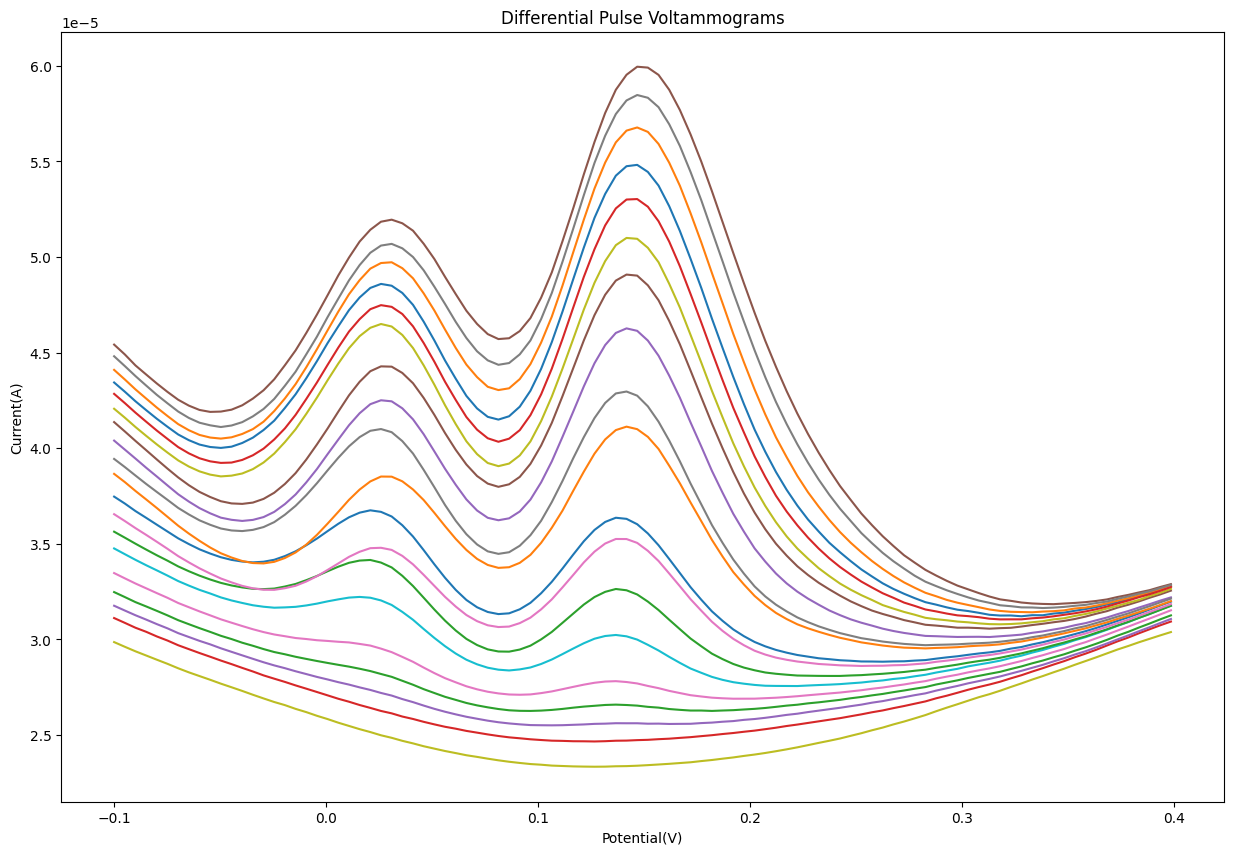

In [57]:
# Plot the data
plt.figure(figsize=(15,10))
for keys in mod_csvs.keys():
  ax1 = sns.lineplot(x='Potential(V)', y='Current(A)', data=mod_csvs[keys], legend="full")
plt.title("Differential Pulse Voltammograms")
plt.xlabel("Potential(V)")
plt.ylabel("Current(A)")
plt.show()

In [58]:
mu = '\u03BC'

def LegendNameSetter(filename):
    if "_mu_" in filename:
        for i, c in enumerate(filename):
            if c.isdigit():
                continue
            if re.search(r'\.',c):
              continue
            else:
                index_of_digit = i
                break

        alpha_in_filename = filename[index_of_digit:]
        converted_filename = filename[:index_of_digit] + mu + alpha_in_filename.strip("_mu_")

        return converted_filename

    elif "_n_" in filename:
        for i, c in enumerate(filename):
            if c.isdigit():
                continue
            if re.search(r'\.',c):
                continue
            else:
                index_of_digit = i
                break

        alpha_in_filename = filename[index_of_digit:]
        converted_filename = filename[:index_of_digit] + 'n' + alpha_in_filename.strip("_n_")

        return converted_filename
    else:
        return filename

In [59]:
keys_list = list(mod_csvs.keys())
keys_list

['100_mu_M',
 '150_mu_M',
 '10_mu_M',
 '1_mu_M',
 '250_mu_M',
 '300_mu_M',
 '20_mu_M',
 '200_mu_M',
 '350_mu_M',
 '40_mu_M',
 '450_mu_M',
 '500_mu_M',
 '60_mu_M',
 '400_mu_M',
 '5_mu_M',
 '600_mu_M',
 '80_mu_M',
 '550_mu_M',
 '0.5_mu_M']

In [60]:
concentration_file_names = list()
concentration_list = list()
for i in keys_list:
  concentration_file_names = LegendNameSetter(i)
  concentration_list.append(concentration_file_names)

concentration_list

['100μM',
 '150μM',
 '10μM',
 '1μM',
 '250μM',
 '300μM',
 '20μM',
 '200μM',
 '350μM',
 '40μM',
 '450μM',
 '500μM',
 '60μM',
 '400μM',
 '5μM',
 '600μM',
 '80μM',
 '550μM',
 '0.5μM']

In [61]:
concentration_values = [s.replace('μM','') for s in concentration_list]
concentration_values = [float(i) for i in concentration_values]
concentration_values

[100.0,
 150.0,
 10.0,
 1.0,
 250.0,
 300.0,
 20.0,
 200.0,
 350.0,
 40.0,
 450.0,
 500.0,
 60.0,
 400.0,
 5.0,
 600.0,
 80.0,
 550.0,
 0.5]

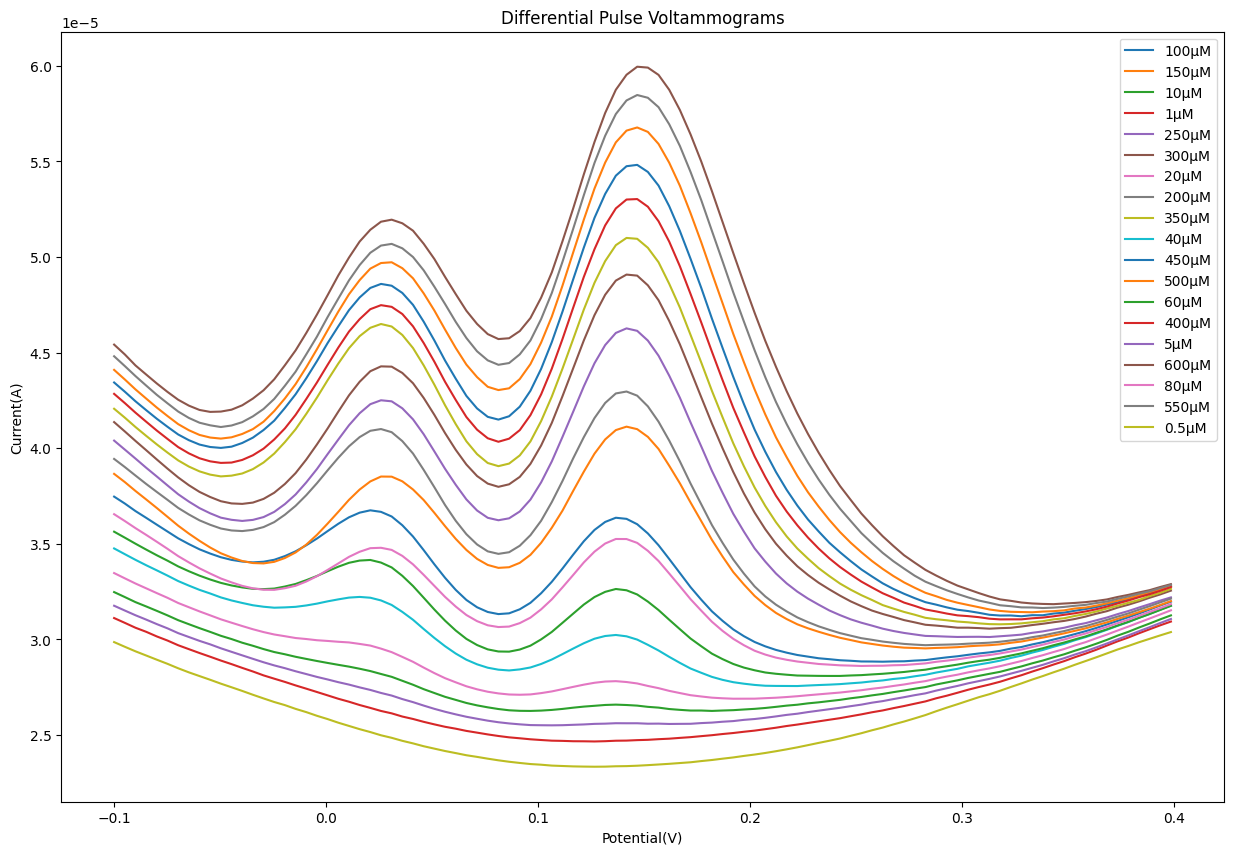

In [62]:
plt.figure(figsize=(15, 10))
lines = []  # List to store plot objects
for i, keys in enumerate(mod_csvs.keys()):
  line, = plt.plot(mod_csvs[keys]['Potential(V)'], mod_csvs[keys]['Current(A)'], label=concentration_list[i])
  lines.append(line)  # Add the line object to the list
plt.title("Differential Pulse Voltammograms")
plt.xlabel("Potential(V)")
plt.ylabel("Current(A)")
plt.legend(handles=lines)  # Add the legend using the stored line objects
plt.show()

In [63]:
def find_peaks_and_values(data, key):
    """Finds peaks in the data and extracts corresponding potentials and currents."""
    peaks, _ = find_peaks(data[key]['Current(A)'])
    potentials = data[key]['Potential(V)'].values.tolist()
    currents = data[key]['Current(A)'].values.tolist()
    peak_potentials = [potentials[i] for i in peaks]
    peak_currents = [currents[i] for i in peaks]
    return peak_potentials, peak_currents

# Initialize dictionaries to store peak data
peak_data = {'HQ_Peak_Potential(V)': [], 'CC_Peak_Potential(V)': [],
             'HQ_Peak_Current(A)': [], 'CC_Peak_Current(A)': []}

# Loop through the keys and extract peak data
for key in mod_csvs.keys():
    peak_potentials, peak_currents = find_peaks_and_values(mod_csvs, key)

    # Append peak data to the dictionaries
    peak_data['HQ_Peak_Potential(V)'].append(peak_potentials[0] if len(peak_potentials) >= 1 else np.nan)
    peak_data['CC_Peak_Potential(V)'].append(peak_potentials[1] if len(peak_potentials) >= 2 else np.nan)
    peak_data['HQ_Peak_Current(A)'].append(peak_currents[0] if len(peak_currents) >= 1 else np.nan)
    peak_data['CC_Peak_Current(A)'].append(peak_currents[1] if len(peak_currents) >= 2 else np.nan)

# Create a pandas DataFrame directly using the peak_data dictionary
peak_df = pd.DataFrame(peak_data, index=mod_csvs.keys())

# Convert concentration values to float and add to DataFrame
concentration_values = [float(s.replace('μM','')) for s in concentration_list]
peak_df['Concentration(μM)'] = np.array(concentration_values)
peak_df

,HQ_Peak_Potential(V),CC_Peak_Potential(V),HQ_Peak_Current(A),CC_Peak_Current(A),Concentration(μM)
100_mu_M,0.020905,0.136719,0.000037,0.000036,100.0
150_mu_M,0.025940,0.141754,0.000039,0.000041,150.0
10_mu_M,0.136719,0.177002,0.000027,0.000026,10.0
1_mu_M,NaN,NaN,NaN,NaN,1.0
250_mu_M,0.025940,0.141754,0.000043,0.000046,250.0
300_mu_M,0.025940,0.141754,0.000044,0.000049,300.0
20_mu_M,0.136719,NaN,0.000028,NaN,20.0
200_mu_M,0.025940,0.141754,0.000041,0.000043,200.0
350_mu_M,0.025940,0.141754,0.000046,0.000051,350.0
40_mu_M,0.015869,0.136719,0.000032,0.000030,40.0


In [64]:
peak_df.sort_values(by='Concentration(μM)', ascending=True, inplace=True)
peak_df

,HQ_Peak_Potential(V),CC_Peak_Potential(V),HQ_Peak_Current(A),CC_Peak_Current(A),Concentration(μM)
0.5_mu_M,NaN,NaN,NaN,NaN,0.5
1_mu_M,NaN,NaN,NaN,NaN,1.0
5_mu_M,0.136719,0.146790,0.000026,0.000026,5.0
10_mu_M,0.136719,0.177002,0.000027,0.000026,10.0
20_mu_M,0.136719,NaN,0.000028,NaN,20.0
40_mu_M,0.015869,0.136719,0.000032,0.000030,40.0
60_mu_M,0.020905,0.136719,0.000034,0.000033,60.0
80_mu_M,0.025940,0.136719,0.000035,0.000035,80.0
100_mu_M,0.020905,0.136719,0.000037,0.000036,100.0
150_mu_M,0.025940,0.141754,0.000039,0.000041,150.0


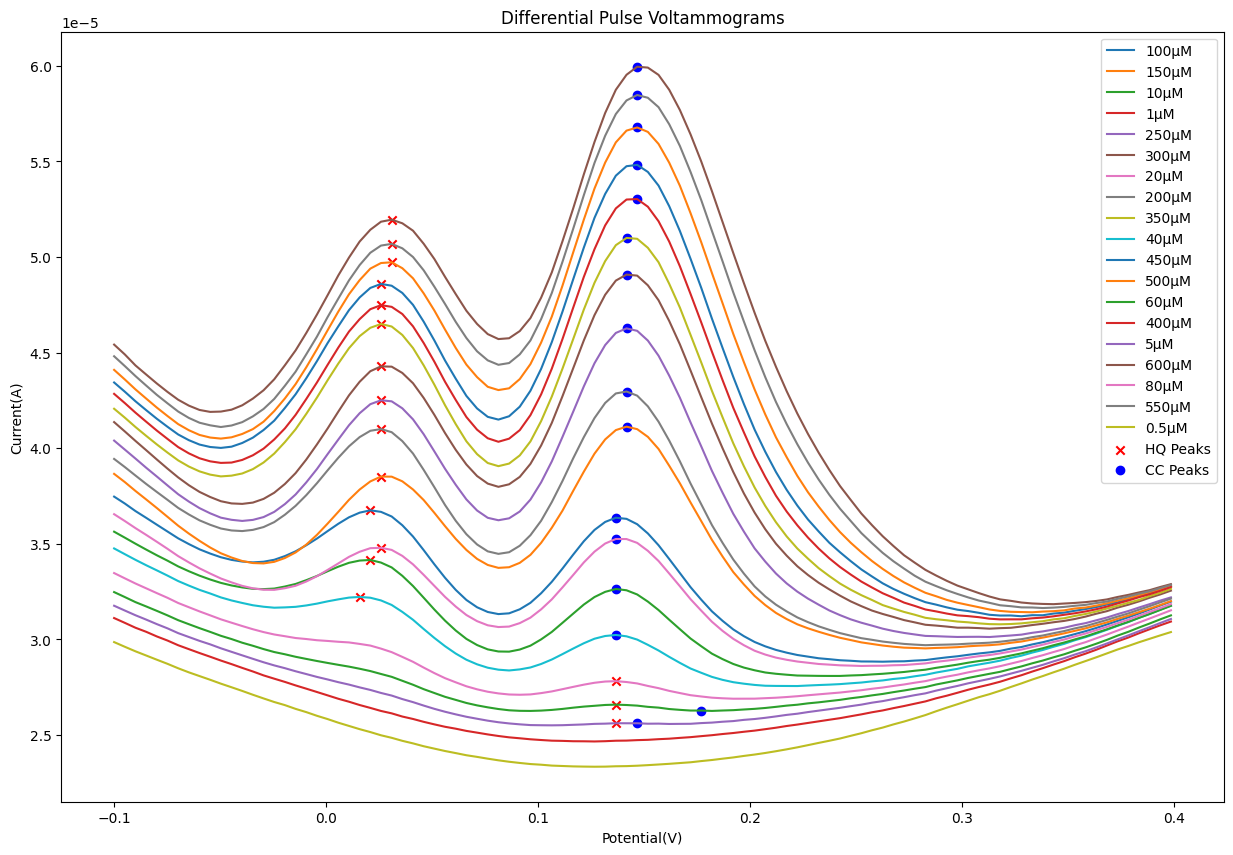

In [65]:
plt.figure(figsize=(15, 10))
lines = []  # List to store plot objects
for i, keys in enumerate(mod_csvs.keys()):
  line, = plt.plot(mod_csvs[keys]['Potential(V)'], mod_csvs[keys]['Current(A)'], label=concentration_list[i])
  lines.append(line)  # Add the line object to the list
plt.title("Differential Pulse Voltammograms")
plt.xlabel("Potential(V)")
plt.ylabel("Current(A)")
plt.legend(handles=lines)  # Add the legend using the stored line objects
# Plot the peaks
plt.scatter(peak_df['HQ_Peak_Potential(V)'], peak_df['HQ_Peak_Current(A)'], color='red', marker='x', label='HQ Peaks')
plt.scatter(peak_df['CC_Peak_Potential(V)'], peak_df['CC_Peak_Current(A)'], color='blue', marker='o', label='CC Peaks')
plt.legend()
plt.show()

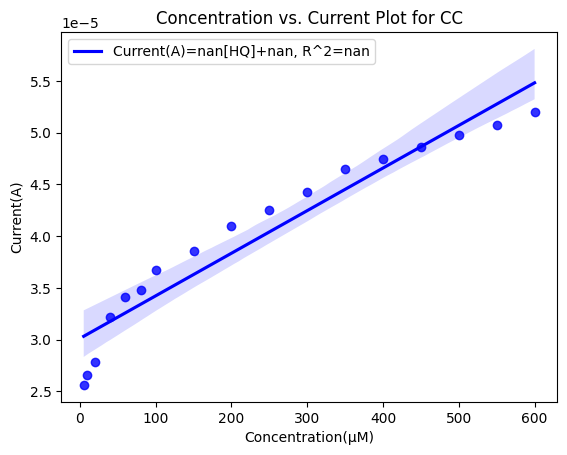

In [72]:
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(peak_df['Concentration(μM)'], peak_df['HQ_Peak_Current(A)'])

# use line_kws to set line label for legend
ax = sns.regplot(x="Concentration(μM)", y="HQ_Peak_Current(A)", data=peak_df, color='b',  line_kws={'label':"Current(A)={0:.2g}[HQ]+{1:.2g}, R^2={2:.3f}".format(slope,intercept, r_value)})

# plot legend
ax.legend(loc='upper left')

plt.title("Concentration vs. Current Plot for HQ")
plt.xlabel("Concentration(μM)")
plt.ylabel("Current(A)")
plt.show()

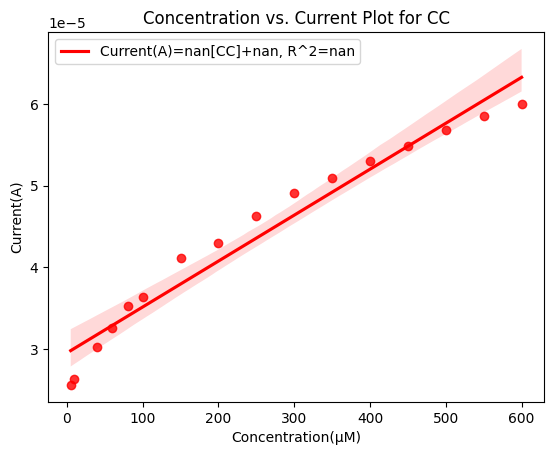

In [71]:
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(peak_df['Concentration(μM)'], peak_df['CC_Peak_Current(A)'])

# use line_kws to set line label for legend
ax = sns.regplot(x="Concentration(μM)", y="CC_Peak_Current(A)", data=peak_df, color='r',  line_kws={'label':"Current(A)={0:.2g}[CC]+{1:.2g}, R^2={2:.3f}".format(slope,intercept, r_value)})

# plot legend
ax.legend(loc='upper left')

plt.title("Concentration vs. Current Plot for CC")
plt.xlabel("Concentration(μM)")
plt.ylabel("Current(A)")
plt.show()